In [11]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) =reuters.load_data(num_words=10000)

In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=46, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [17]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 2.7118 - accuracy: 0.4977 - val_loss: 1.8547 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 1.5672 - accuracy: 0.6736 - val_loss: 1.4017 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.2049 - accuracy: 0.7377 - val_loss: 1.2089 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.9823 - accuracy: 0.7868 - val_loss: 1.1068 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8168 - accuracy: 0.8229 - val_loss: 1.0357 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.8538 - val_loss: 0.9717 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5688 - accuracy: 0.8776 - val_loss: 0.9186 - val_accuracy: 0.8070
Epoch 8/20
16/16 [=

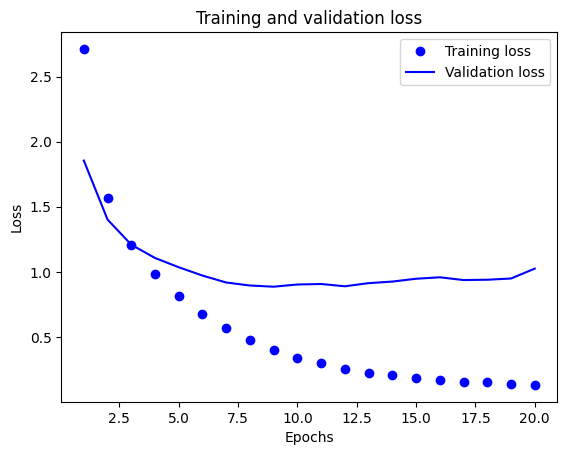

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

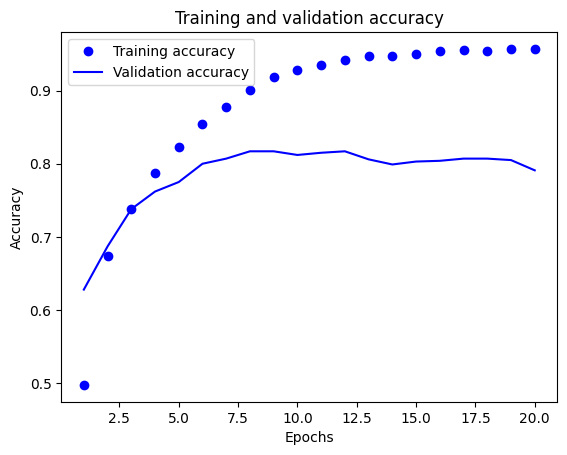

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 15ms/step - loss: 2.7283 - accuracy: 0.4402 - val_loss: 1.8432 - val_accuracy: 0.6120
Epoch 2/9
16/16 [==============================] - 0s 6ms/step - loss: 1.5500 - accuracy: 0.6743 - val_loss: 1.3997 - val_accuracy: 0.6870
Epoch 3/9
16/16 [==============================] - 0s 6ms/step - loss: 1.1898 - accuracy: 0.7398 - val_loss: 1.2027 - val_accuracy: 0.7240
Epoch 4/9
16/16 [==============================] - 0s 6ms/step - loss: 0.9679 - accuracy: 0.7899 - val_loss: 1.0855 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 0s 6ms/step - loss: 0.8024 - accuracy: 0.8285 - val_loss: 1.0218 - val_accuracy: 0.7680
Epoch 6/9
16/16 [==============================] - 0s 6ms/step - loss: 0.6617 - accuracy: 0.8588 - val_loss: 0.9475 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.8826 - val_loss: 0.9227 - val_accuracy: 0.7980
Epoch 8/9
16/16 [=========

In [22]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 797us/step


In [23]:
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3


In [33]:
model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 3.2324 - accuracy: 0.2631 - val_loss: 2.0668 - val_accuracy: 0.5360
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 2.1202 - accuracy: 0.4808 - val_loss: 1.6921 - val_accuracy: 0.6070
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 1.7634 - accuracy: 0.5763 - val_loss: 1.4924 - val_accuracy: 0.6830
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 1.5386 - accuracy: 0.6393 - val_loss: 1.3174 - val_accuracy: 0.7000
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 1.3740 - accuracy: 0.6780 - val_loss: 1.2424 - val_accuracy: 0.7090
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 1.2573 - accuracy: 0.7017 - val_loss: 1.1968 - val_accuracy: 0.7170
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 1.1474 - accuracy: 0.7199 - val_loss: 1.1742 - val_accuracy: 0.7230
Epoch 8/50
16/16 [=

In [34]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 1.6353 - accuracy: 0.7952


[1.635337233543396, 0.7951914668083191]